# EDA with Python II
In this notebook, we will explore :
1. Sampling & Randomization
2. Melt
3. Feature Engineering
4. Filtering
5. Cross Tabulation
6. Group By Aggregation

### 1. Business Understanding

Sebuah jaringan supermarket bertujuan untuk menganalisis data penjualannya untuk meningkatkan manajemen inventori, mengidentifikasi tren penjualan, dan meningkatkan kepuasan pelanggan. Dengan memahami pola penjualan, supermarket dapat mengoptimalkan tingkat persediaan, menyesuaikan strategi pemasaran, dan meningkatkan efisiensi operasional.

**Key Questions:**
- Apa saja produk yang memiliki harga unit di atas rata-rata?
- Cabang mana yang memiliki total penjualan tertinggi?
- Bagaimana jumlah maksimal, minimal, jumlah dari barang yang terjual di tiap Branch ?
- Bagaimana total penjualan setiap kategori produk di setiap branch?
- Metode pembayaran apa yang paling sering digunakan oleh customer ?
- Kapan waktu dengan penjualan tertinggi dalam sehari?

### 2. Data Dictionary
File `supermarket_sales.csv` berisi berbagai kolom, masing-masing mewakili atribut yang berbeda dari data penjualan. Berikut adalah deskripsi singkat dari setiap kolom:

| Nama Kolom               | Deskripsi                                |
|--------------------------|------------------------------------------|
| Invoice ID               | Identifikator unik untuk setiap faktur   |
| Branch                   | Cabang tempat transaksi terjadi          |
| City                     | Kota tempat cabang berada                |
| Customer type            | Jenis pelanggan (misalnya, Member, Normal)|
| Gender                   | Jenis kelamin pelanggan                  |
| Product line             | Kategori produk                          |
| Unit price               | Harga per unit produk                    |
| Quantity                 | Jumlah produk yang terjual               |
| Tax 5%                   | Pajak yang dikenakan pada penjualan      |
| Total                    | Jumlah total penjualan (termasuk pajak)  |
| Date                     | Tanggal transaksi                        |
| Time                     | Waktu transaksi                          |
| Payment                  | Metode pembayaran yang digunakan pelanggan|
| cogs                     | Biaya barang yang terjual                |
| gross margin percentage  | Persentase margin kotor                  |
| gross income             | Pendapatan kotor dari penjualan          |
| Rating                   | Penilaian pelanggan terhadap layanan/produk|

## 1. Sampling & Randomization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option("display.max_columns", None) # show all columns
pd.set_option("display.max_rows", None) # show all rows

In [ ]:
df = pd.read_csv('supermarket_sales.csv')
# population

In [ ]:
# to check rows and columns
df.shape

(1000, 17)

In [ ]:
#Slovin method
def slovin(population, error):
    sample =  math.ceil(len(population) / (1 + math.ceil(len(population) * error**2)))
    print('Ukuran sample hasil perhitungan Slovin : ', sample)

In [ ]:
#function for sample random sampling
def simple_random(data, size):
    dt = data.sample(n = size, random_state = 42)
    return dt

In [ ]:
#slovin method : amount of sample size
# error 5%
slovin(df, 0.05)

Ukuran sample hasil perhitungan Slovin :  250


In [ ]:
# error 2,5 %
slovin(df, 0.025)

Ukuran sample hasil perhitungan Slovin :  616


In [ ]:
# error 1%
slovin(df, 0.01)

Ukuran sample hasil perhitungan Slovin :  910


In [ ]:
# Simple Random Sample
# df -> populasi
# simple_random_sample -> data sampel
simple_random_sample = simple_random(df, 616)

# Menampilkan hasil sample
print("Simple Random Sample:", simple_random_sample.shape)
simple_random_sample.head()

Simple Random Sample: (616, 17)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
521,451-28-5717,C,Naypyitaw,Member,Female,Home and lifestyle,83.17,6,24.9510,523.9710,3/20/2019,11:23,Cash,499.02,4.761905,24.9510,7.3
737,137-63-5492,C,Naypyitaw,Normal,Male,Electronic accessories,58.76,10,29.3800,616.9800,1/29/2019,14:26,Ewallet,587.60,4.761905,29.3800,9.0
740,733-29-1227,C,Naypyitaw,Normal,Male,Home and lifestyle,55.61,7,19.4635,408.7335,3/23/2019,12:41,Cash,389.27,4.761905,19.4635,8.5
660,322-02-2271,B,Mandalay,Normal,Female,Sports and travel,42.97,3,6.4455,135.3555,2/3/2019,11:46,Cash,128.91,4.761905,6.4455,9.3
411,569-71-4390,B,Mandalay,Normal,Male,Sports and travel,21.87,2,2.1870,45.9270,1/25/2019,14:29,Ewallet,43.74,4.761905,2.1870,6.9


In [ ]:
# describe population data
print('Population Statistical Summary')
df[['Total','cogs','gross income','Unit price']].describe()

Population Statistical Summary


,Total,cogs,gross income,Unit price
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,322.966749,307.58738,15.379369,55.672130
std,245.885335,234.17651,11.708825,26.494628
min,10.678500,10.17000,0.508500,10.080000
25%,124.422375,118.49750,5.924875,32.875000
50%,253.848000,241.76000,12.088000,55.230000
75%,471.350250,448.90500,22.445250,77.935000
max,1042.650000,993.00000,49.650000,99.960000


In [ ]:
# describe sampel data
print('Sample Statistical Summary')
simple_random_sample[['Total','cogs','gross income','Unit price']].describe()

Sample Statistical Summary


,Total,cogs,gross income,Unit price
count,616.000000,616.000000,616.000000,616.00000
mean,324.823074,309.355308,15.467765,55.68625
std,246.352673,234.621594,11.731080,26.70841
min,10.678500,10.170000,0.508500,10.13000
25%,125.695500,119.710000,5.985500,33.27500
50%,257.911500,245.630000,12.281500,54.61000
75%,478.584750,455.795000,22.789750,78.17500
max,1042.650000,993.000000,49.650000,99.96000


In [ ]:
simple_random_sample.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
521,451-28-5717,C,Naypyitaw,Member,Female,Home and lifestyle,83.17,6,24.9510,523.9710,3/20/2019,11:23,Cash,499.02,4.761905,24.9510,7.3
737,137-63-5492,C,Naypyitaw,Normal,Male,Electronic accessories,58.76,10,29.3800,616.9800,1/29/2019,14:26,Ewallet,587.60,4.761905,29.3800,9.0
740,733-29-1227,C,Naypyitaw,Normal,Male,Home and lifestyle,55.61,7,19.4635,408.7335,3/23/2019,12:41,Cash,389.27,4.761905,19.4635,8.5
660,322-02-2271,B,Mandalay,Normal,Female,Sports and travel,42.97,3,6.4455,135.3555,2/3/2019,11:46,Cash,128.91,4.761905,6.4455,9.3
411,569-71-4390,B,Mandalay,Normal,Male,Sports and travel,21.87,2,2.1870,45.9270,1/25/2019,14:29,Ewallet,43.74,4.761905,2.1870,6.9


#### In case of big data, you can use sample if there is run out of memory when processing the data. But for this session, we will use all of data.

# 2. Feature Engineering for EDA
### A. Handling duplicate

In [ ]:
# copy to data, feature engineering process for EDA
data = df.copy()

In [ ]:
len(data.drop_duplicates()) / len(data)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

No duplicate !

### B. Missing value Checking and Handling

In [ ]:
# pendekatan isna
data.isna().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [ ]:
# pendekatan value counts
for col in data.columns:
    print(f"===={col}====")
    print(data[col].value_counts())
    display()

Streaming output truncated to the last 5000 lines.
17.77    1
93.72    1
78.07    1
83.78    1
96.58    1
99.42    1
68.12    1
62.62    1
60.88    1
54.92    1
30.12    1
86.72    1
56.11    1
69.12    1
56.47    1
56.69    1
18.93    1
82.63    1
91.40    1
44.59    1
17.87    1
15.43    1
16.16    1
85.98    1
44.34    1
89.60    1
72.35    1
55.73    1
15.37    1
58.22    1
86.31    1
85.39    1
68.84    1
73.56    1
36.26    1
54.84    1
14.48    1
25.51    1
46.95    1
43.19    1
71.38    1
38.27    1
24.89    1
97.48    1
15.28    1
68.93    1
72.61    1
54.67    1
86.04    1
87.98    1
33.20    1
88.63    1
52.59    1
33.52    1
87.67    1
88.36    1
94.13    1
97.16    1
12.45    1
52.75    1
82.70    1
48.71    1
78.55    1
23.07    1
58.26    1
30.35    1
88.67    1
27.38    1
62.13    1
33.98    1
55.07    1
16.49    1
98.21    1
72.84    1
58.07    1
80.79    1
27.02    1
21.94    1
51.36    1
10.96    1
53.44    1
99.56    1
57.12    1
63.91    1
81.97    1
15.81    1
75.

#### Based on checking one by one, there is no missing value

### C. Outlier Handling

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df['gross margin percentage'].value_counts()

,count
gross margin percentage,
4.761905,1000


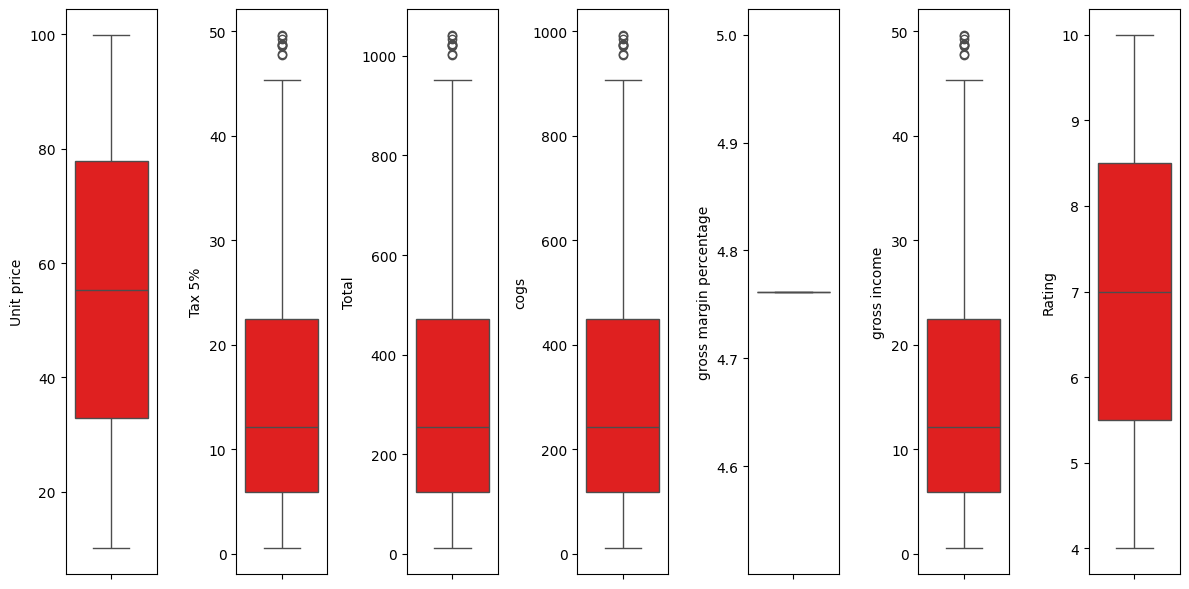

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = ['Unit price','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

#### The outlier still make sense

## Reasoning not doing encoding and feature scalling
After we look at and investigate each column, there are 2 things we can get:
- The categorical columns in contains various information, so we just leave it for analysis with initial data.
- Numerical columns `all have reasonable values` within the range of values in each column and have clear definition and the range of each columns still make sense so the limits in each column so we don't need to do feature scaling.

# EDA Question :
1. Apa saja produk yang memiliki harga unit di atas rata-rata?
2. Produk mana yang memiliki Total penjualan tertinggi ?
3. Cabang mana yang memiliki total penjualan tertinggi ?
4. Bagaimana jumlah maksimal, minimal, jumlah dari barang yang terjual di tiap Branch ?
5. Bagaimana total penjualan setiap kategori produk di setiap branch ?
6. Metode pembayaran apa yang paling sering digunakan oleh customer ?
7. Kapan waktu dengan penjualan tertinggi dalam sehari ?

### Filtering
1. Apa saja produk yang memiliki harga unit di atas rata-rata?

In [ ]:
data['Unit price'].mean()

np.float64(55.67213)

In [ ]:
# Contoh Filter: Unit price di atas rata-rata
df_filtered = data[data['Unit price'] > data['Unit price'].mean()]
df_filtered

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761905,24.1255,4.6
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.7830,457.4430,1/1/2019,10:39,Credit card,435.66,4.761905,21.7830,6.9


In [ ]:
df_filtered['Product line'].value_counts()

,count
Product line,
Fashion accessories,88
Sports and travel,86
Health and beauty,81
Food and beverages,81
Home and lifestyle,79
Electronic accessories,79


In [ ]:
# Hitung jumlah produk per Product line dan urutkan dari tinggi ke rendah
product_counts = df_filtered['Product line'].value_counts().sort_values(ascending=False)
product_counts

,count
Product line,
Fashion accessories,88
Sports and travel,86
Health and beauty,81
Food and beverages,81
Home and lifestyle,79
Electronic accessories,79


In [ ]:
# Hitung jumlah produk per Product line dan urutkan dari tinggi ke rendah
product_counts = df_filtered['Product line'].value_counts().sort_values(ascending=False).reset_index()
product_counts

,Product line,count
0,Fashion accessories,88
1,Sports and travel,86
2,Health and beauty,81
3,Food and beverages,81
4,Home and lifestyle,79
5,Electronic accessories,79


In [ ]:
product_counts.columns = ['Product line', 'Jumlah Produk']  # Menamai kolom yang sesuai
product_counts

,Product line,Jumlah Produk
0,Fashion accessories,88
1,Sports and travel,86
2,Health and beauty,81
3,Food and beverages,81
4,Home and lifestyle,79
5,Electronic accessories,79


<ipython-input-26-4dbaf0160f02>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='Jumlah Produk', data=product_counts, palette='viridis')


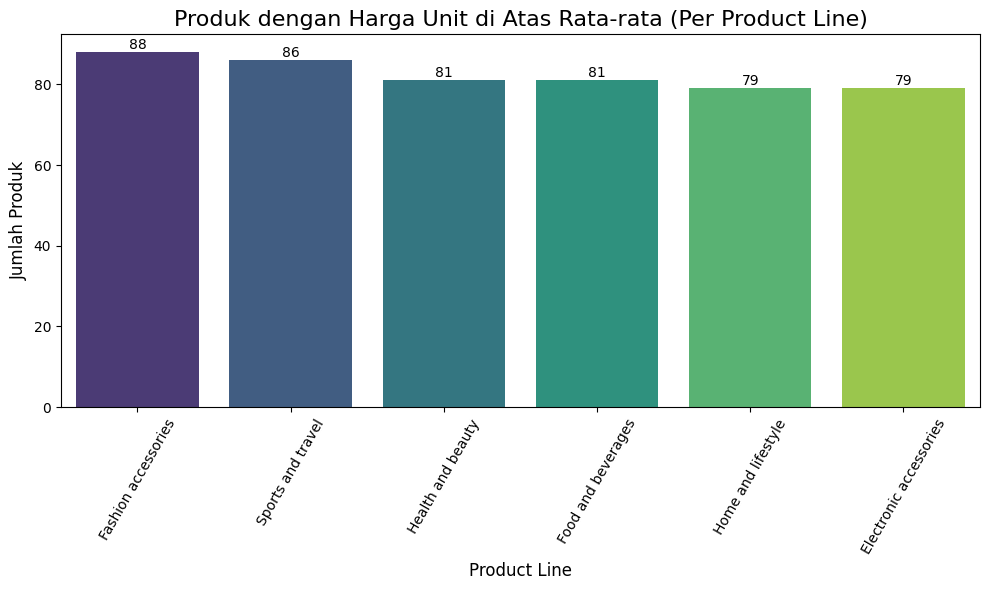

In [ ]:
# Visualisasi dalam bentuk bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Jumlah Produk', data=product_counts, palette='viridis')

# Tambahkan angka di atas bar dengan format angka
for i, count in enumerate(product_counts['Jumlah Produk']):
    plt.text(i, count + (0.01 * product_counts['Jumlah Produk'].max()), f"{count:,.0f}",
             ha='center', fontsize=10, color='black')

# Tambahkan judul dan label
plt.title('Produk dengan Harga Unit di Atas Rata-rata (Per Product Line)', fontsize=16)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Jumlah Produk', fontsize=12)
plt.xticks(rotation=60)

plt.tight_layout()  # Menghindari teks terpotong
plt.show()

**Observation :**
Produk yang memiliki harga per unit diatas rata-rata ialah : Fashion Accessories, Sports and travel, Health and Beauty

### Group By
2. Produk mana yang memiliki Total penjualan tertinggi ?

In [ ]:
# Mengelompokkan berdasarkan product line dan menghitung total penjualan
penjualan_produk = data.groupby('Product line')['Total'].sum()
penjualan_produk

,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


In [ ]:
# Mengelompokkan berdasarkan Product line dan menghitung total penjualan
penjualan_produk = data.groupby('Product line')['Total'].sum().sort_values(ascending=False).reset_index()
penjualan_produk

,Product line,Total
0,Food and beverages,56144.8440
1,Sports and travel,55122.8265
2,Electronic accessories,54337.5315
3,Fashion accessories,54305.8950
4,Home and lifestyle,53861.9130
5,Health and beauty,49193.7390


<ipython-input-29-1a0cf8a9ec02>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='Total', data=penjualan_produk, palette='viridis')


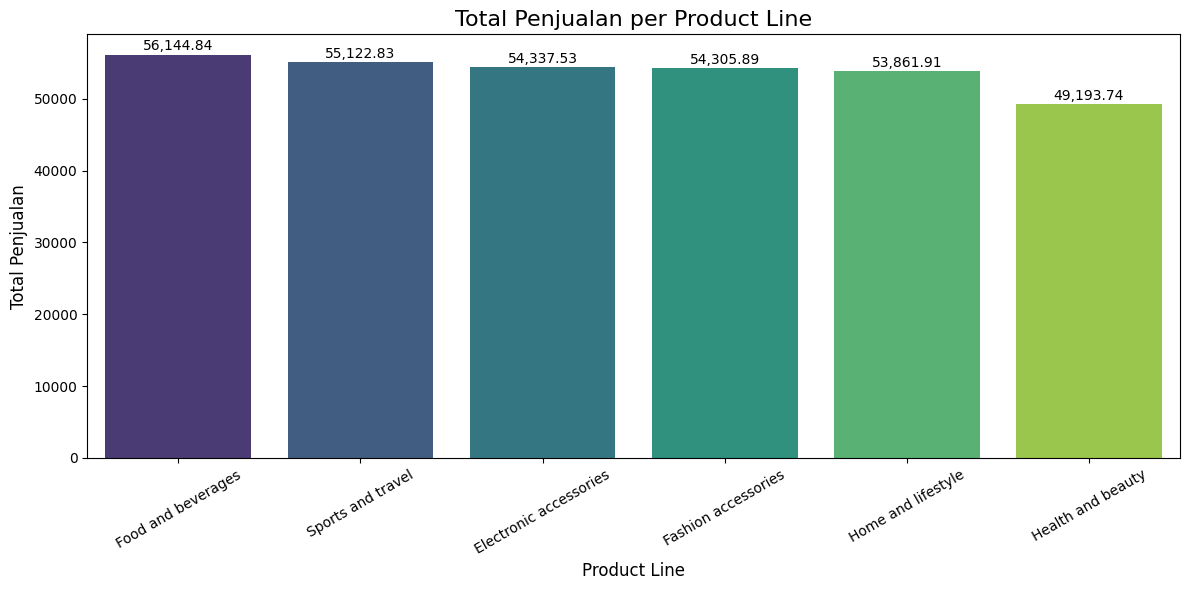

In [ ]:
# Visualisasi barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Total', data=penjualan_produk, palette='viridis')

# Tambahkan angka di atas bar
for i, total in enumerate(penjualan_produk['Total']):
    plt.text(i, total + (0.01 * penjualan_produk['Total'].max()), f"{total:,.2f}",
             ha='center', fontsize=10, color='black')

# Menambahkan judul dan label
plt.title('Total Penjualan per Product Line', fontsize=16)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()  # Menghindari teks terpotong
plt.show()

**Observation :**
Total penjualan tertinggi ialah pada Food and Beverages, walaupun harga per unitnya berada di urutan ke 4 (pada pertanyaan 1), tapi total penjualannya paling tinggi dibandingkan barang yang lain.

### Group By 2 kolom
3. Cabang mana yang memiliki total penjualan tertinggi?

In [ ]:
df_grouped = df.groupby('Branch')['Total'].sum().reset_index()
df_grouped

,Branch,Total
0,A,106200.3705
1,B,106197.6720
2,C,110568.7065


In [ ]:
# Urutkan berdasarkan total penjualan
df_grouped = df_grouped.sort_values(by='Total', ascending=False)
df_grouped

,Branch,Total
2,C,110568.7065
0,A,106200.3705
1,B,106197.6720


<ipython-input-32-01858db07aef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='Total', data=df_grouped, palette='viridis')


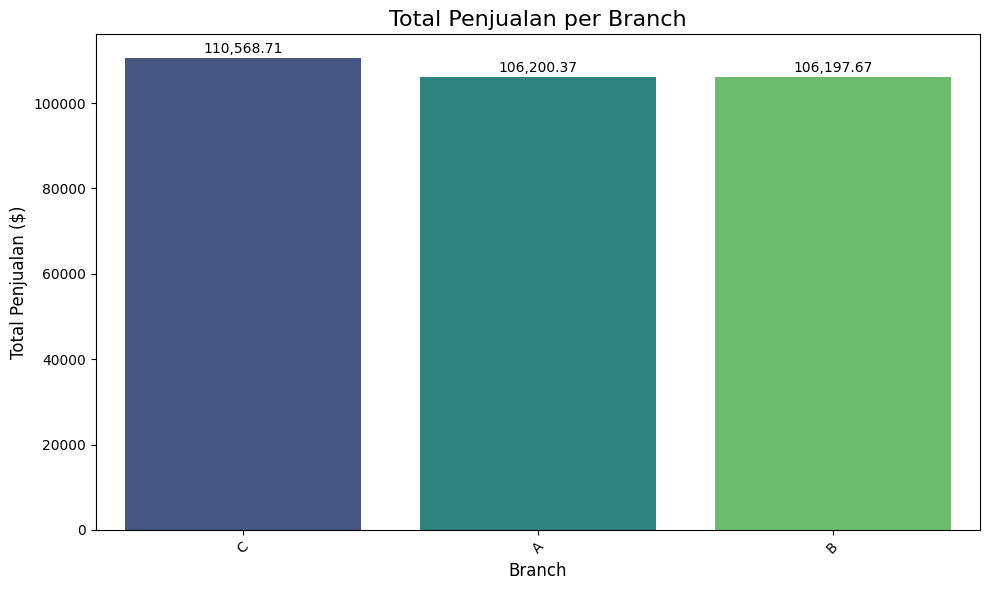

In [ ]:
# Visualisasi barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Total', data=df_grouped, palette='viridis')

# Tambahkan angka di atas bar (Opsional)
for i, total in enumerate(df_grouped['Total']):
    plt.text(i, total + (0.01 * df_grouped['Total'].max()), f"{total:,.2f}",
             ha='center', fontsize=10, color='black')

# Menambahkan judul dan label
plt.title('Total Penjualan per Branch', fontsize=16)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Total Penjualan ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()  # Menghindari teks terpotong
plt.show()

**Observation :**
Total penjualan tertinggi ialah pada branch C.

4. Bagaimana jumlah maksimal, minimal, jumlah dari barang yang terjual di tiap Branch ?

In [ ]:
df_multiple = df.groupby('Branch')['Quantity'].agg(['max','min','count']).reset_index()
df_multiple

,Branch,max,min,count
0,A,10,1,340
1,B,10,1,332
2,C,10,1,328


<ipython-input-34-ae45b1374b4c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='count', data=df_multiple, palette='Oranges_d')


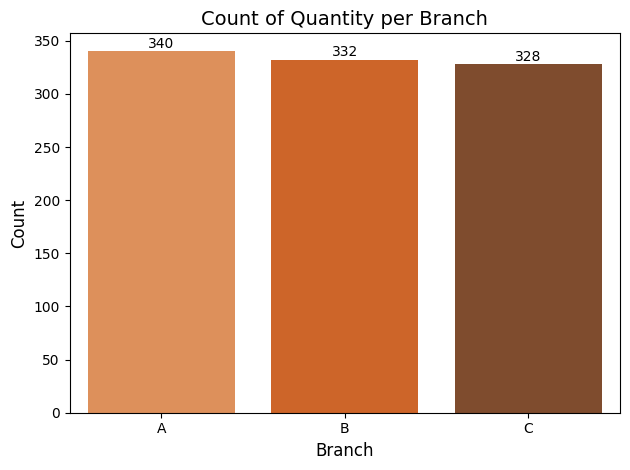

In [ ]:
sns.barplot(x='Branch', y='count', data=df_multiple, palette='Oranges_d')

# Tambahkan angka di atas bar (Opsional)
for i, count_val in enumerate(df_multiple['count']):
    plt.text(i, count_val + (0.01 * df_multiple['count'].max()), f"{count_val:,.0f}",
             ha='center', fontsize=10, color='black')

plt.title('Count of Quantity per Branch', fontsize=14)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Mengatur layout
plt.tight_layout()
plt.show()

**Observation :**
Pada grafik sebelumnya, branch c memiliki total penjualan tertinggi namun memiliki quantity barang yang sedikit hal ini menandakan barang yang terjual di branch c memiliki harga yang relatif tinggi dibandingkan branch lainnya, walaupun dari selisih quantity tidak terlalu jauh.

### Pivoting vs Melt
5. Bagaimana total penjualan setiap kategori produk di setiap branch?

In [ ]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [ ]:
# Membuat pivot table (1)
pd.pivot_table(df, values='Total', index='Branch', columns='Product line', aggfunc='sum')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Branch,,,,,,
A,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995
B,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
C,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280


In [ ]:
# Membuat pivot table (2)
tabel_pivot = pd.pivot_table(df, values='Total', index='Product line', columns='Branch', aggfunc='sum')
tabel_pivot

Branch,A,B,C
Product line,,,
Electronic accessories,18317.1135,17051.4435,18968.9745
Fashion accessories,16332.5085,16413.3165,21560.0700
Food and beverages,17163.1005,15214.8885,23766.8550
Health and beauty,12597.7530,19980.6600,16615.3260
Home and lifestyle,22417.1955,17549.1645,13895.5530
Sports and travel,19372.6995,19988.1990,15761.9280


In [ ]:
tabel_pivot.reset_index()

Branch,Product line,A,B,C
0,Electronic accessories,18317.1135,17051.4435,18968.9745
1,Fashion accessories,16332.5085,16413.3165,21560.0700
2,Food and beverages,17163.1005,15214.8885,23766.8550
3,Health and beauty,12597.7530,19980.6600,16615.3260
4,Home and lifestyle,22417.1955,17549.1645,13895.5530
5,Sports and travel,19372.6995,19988.1990,15761.9280


In [ ]:
# Mengubah pivot table menjadi format long untuk visualisasi
# id_vars -> berkaitan dengan indeks atau rows
# var_name -> berkaitan dengan kolom
# value -> berkaitan dengan nilai yang digunakan
tabel_long = tabel_pivot.reset_index().melt(value_name='Total',var_name='Branch', id_vars='Product line')
tabel_long

,Product line,Branch,Total
0,Electronic accessories,A,18317.1135
1,Fashion accessories,A,16332.5085
2,Food and beverages,A,17163.1005
3,Health and beauty,A,12597.7530
4,Home and lifestyle,A,22417.1955
5,Sports and travel,A,19372.6995
6,Electronic accessories,B,17051.4435
7,Fashion accessories,B,16413.3165
8,Food and beverages,B,15214.8885
9,Health and beauty,B,19980.6600


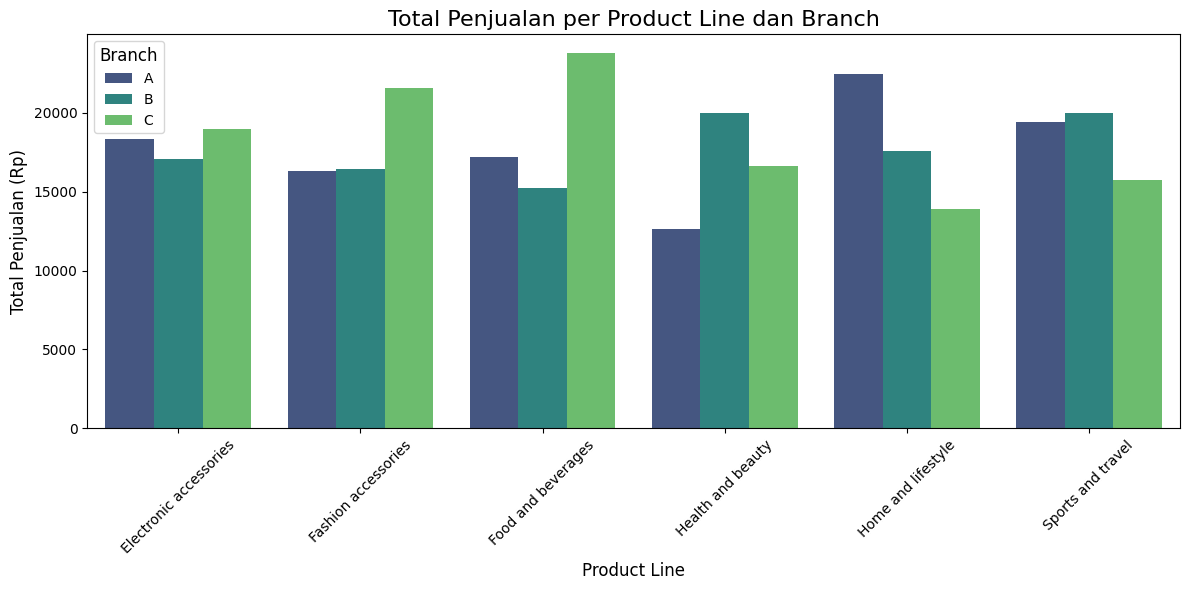

In [ ]:
# version 1
# hue hanya berlaku untuk data kategorikal atau numerikal diskrit
# Visualisasi grouped barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=tabel_long, x='Product line', y='Total', hue='Branch', palette='viridis')

# Tambahkan judul dan label
plt.title('Total Penjualan per Product Line dan Branch', fontsize=16)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Penjualan (Rp)', fontsize=12)
plt.xticks(rotation=45)

# Tambahkan legenda
plt.legend(title='Branch', fontsize=10, title_fontsize=12)
# legenda berkaitan dengan hue, dalam hal ini hue nya ialah Branch

plt.tight_layout()  # Menghindari elemen terpotong
plt.show()

**Observation :**
1. Branch A : total penjualan banyak berasal dari Home and lifecycle
2. Branch B : total penjualan banyak dari Health and beauty, & sports and travel
3. Branch C : total penjualan banyak berasal dari Food and Beverages

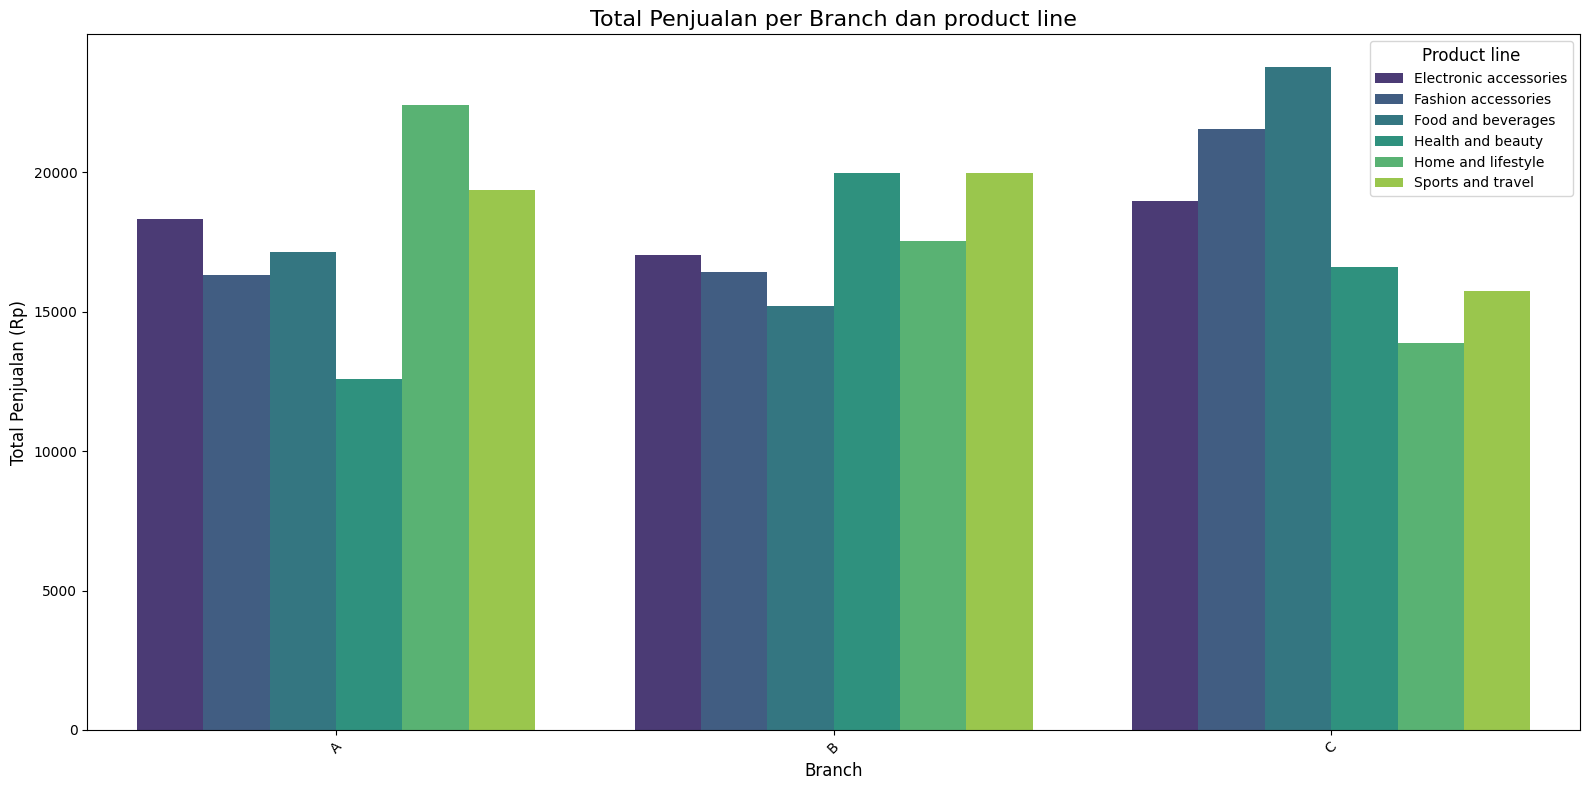

In [ ]:
# version 2
# Visualisasi grouped barplot
plt.figure(figsize=(16, 8))
# 16 -> horizontal atau lebar
# 8 -> vertikal atau tinggi
# hue = legenda

sns.barplot(data=tabel_long, x='Branch', y='Total', hue='Product line', palette='viridis')

# Tambahkan judul dan label
plt.title('Total Penjualan per Branch dan product line', fontsize=16)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Total Penjualan (Rp)', fontsize=12)
plt.xticks(rotation=45)

# Tambahkan legenda
plt.legend(title='Product line', fontsize=10, title_fontsize=12)
# legenda berkaitan dengan hue, dalam hal ini hue nya ialah Product line

plt.tight_layout()  # Menghindari elemen terpotong
plt.show()

## Crosstab
6. Metode pembayaran apa yang paling sering digunakan oleh customer ?

In [ ]:
df['Payment'].value_counts()

,count
Payment,
Ewallet,345
Cash,344
Credit card,311


In [ ]:
# Membuat crosstab untuk melihat distribusi pembayaran per cabang
crosstab = pd.crosstab(df['Branch'], df['Payment'])
crosstab

Payment,Cash,Credit card,Ewallet
Branch,,,
A,110,104,126
B,110,109,113
C,124,98,106


In [ ]:
crosstab.reset_index()

Payment,Branch,Cash,Credit card,Ewallet
0,A,110,104,126
1,B,110,109,113
2,C,124,98,106


In [ ]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [ ]:
# Mengubah crosstab menjadi format long untuk visualisasi
crosstab_long = crosstab.reset_index().melt(id_vars='Branch', var_name='Payment', value_name='Jumlah Pembayaran')
crosstab_long
# cross tab -> Jumlah Pembayaran (nama bebas) -> distribusi frekuensi dari kategori payment di tiap-tiap branch
# pivot -> numeriknya berasal dari kolom numerik yg ada di dataframe

,Branch,Payment,Jumlah Pembayaran
0,A,Cash,110
1,B,Cash,110
2,C,Cash,124
3,A,Credit card,104
4,B,Credit card,109
5,C,Credit card,98
6,A,Ewallet,126
7,B,Ewallet,113
8,C,Ewallet,106


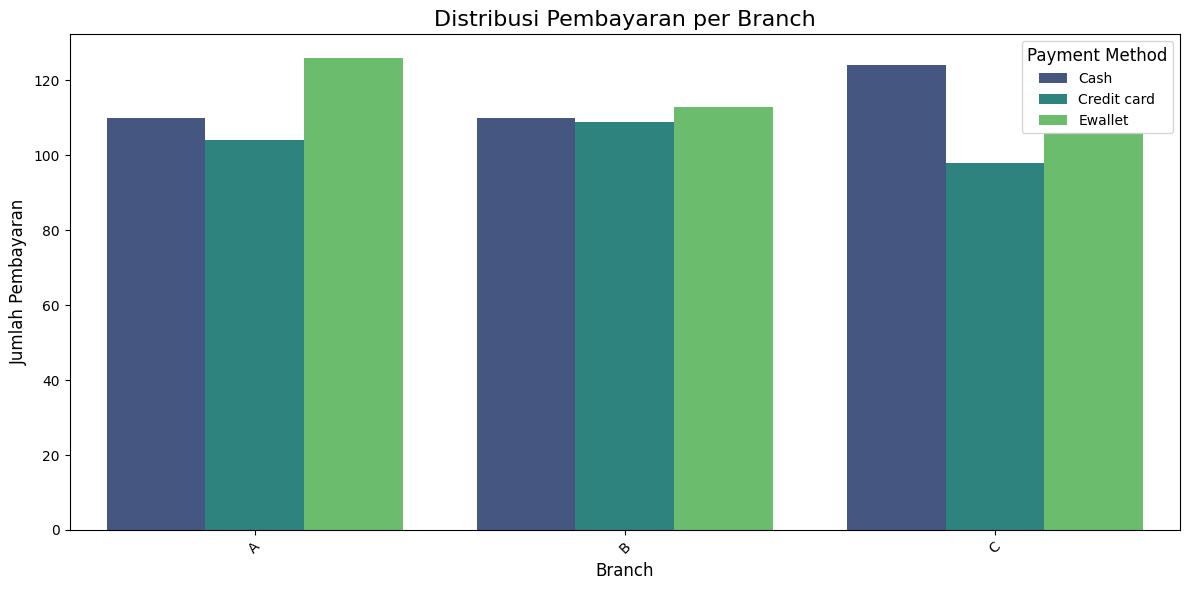

In [ ]:
# Visualisasi grouped barplot
# versi 1
plt.figure(figsize=(12, 6))
sns.barplot(data=crosstab_long, x='Branch', y='Jumlah Pembayaran', hue='Payment', palette='viridis')

# Menambahkan judul dan label
plt.title('Distribusi Pembayaran per Branch', fontsize=16)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Jumlah Pembayaran', fontsize=12)
plt.xticks(rotation=45)

# Menambahkan legenda
plt.legend(title='Payment Method', fontsize=10, title_fontsize=12)

plt.tight_layout()  # Menghindari elemen terpotong
plt.show()

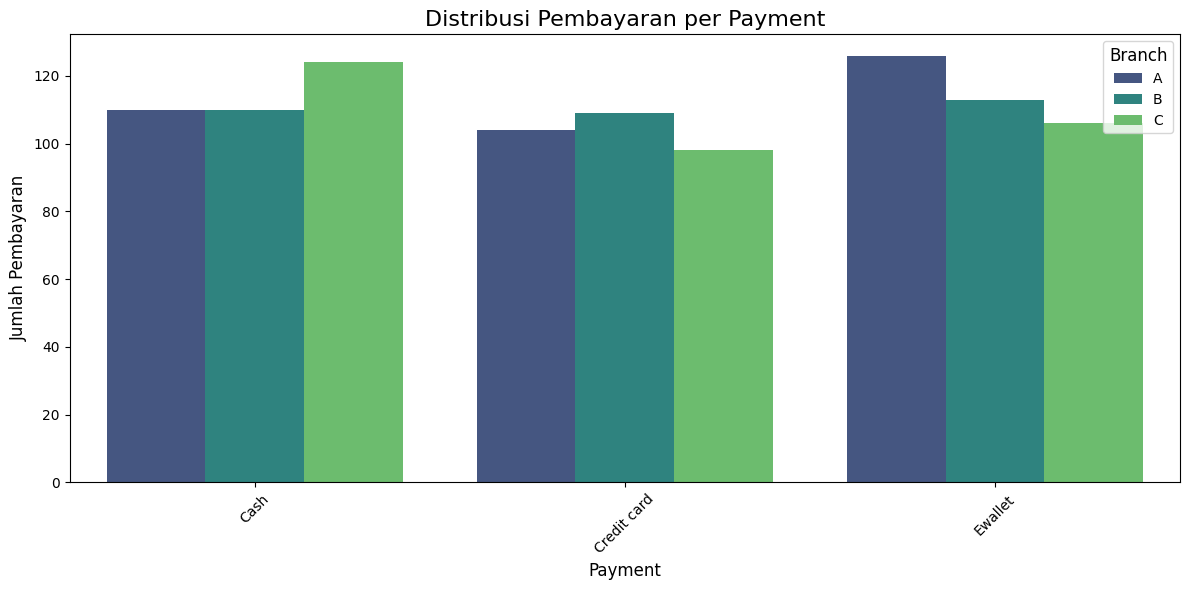

In [ ]:
# Visualisasi grouped barplot
# versi 2
plt.figure(figsize=(12, 6))
sns.barplot(data=crosstab_long, x='Payment', y='Jumlah Pembayaran', hue='Branch', palette='viridis')

# Menambahkan judul dan label
plt.title('Distribusi Pembayaran per Payment', fontsize=16)
plt.xlabel('Payment', fontsize=12)
plt.ylabel('Jumlah Pembayaran', fontsize=12)
plt.xticks(rotation=45)

# Menambahkan legenda
plt.legend(title='Branch', fontsize=10, title_fontsize=12)
# hue berkaitan dengan legenda

plt.tight_layout()  # Menghindari elemen terpotong
plt.show()

**Observation**
1. Branch A dan B memiliki karakteeristik yang mirip yaitu banyak menggunakan ewallet, namun pada branch B tidak terlalu dominan hanya terdapat sedikit perbedaan.
2. Pada branch C transaksi terbanyak dilakukan menggunakan cash.

## Working With Date
7. Kapan waktu dengan penjualan tertinggi dalam sehari?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
data.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [ ]:
# Ubah ke datetime
data["Date"] = pd.to_datetime(data["Date"],format="%m/%d/%Y")
data['DayOfWeek'] = data['Date'].dt.day_name()

In [ ]:
data.groupby("DayOfWeek")["Total"].mean()

,Total
DayOfWeek,
Friday,316.016838
Monday,303.192624
Saturday,342.200058
Sunday,334.269868
Thursday,328.617739
Tuesday,325.836997
Wednesday,305.812133


In [ ]:
# Menghitung rata-rata total penjualan per hari
# Ubah menjadi dataframe
rata_rata_penjualan = data.groupby("DayOfWeek")["Total"].mean().reset_index()
rata_rata_penjualan

,DayOfWeek,Total
0,Friday,316.016838
1,Monday,303.192624
2,Saturday,342.200058
3,Sunday,334.269868
4,Thursday,328.617739
5,Tuesday,325.836997
6,Wednesday,305.812133


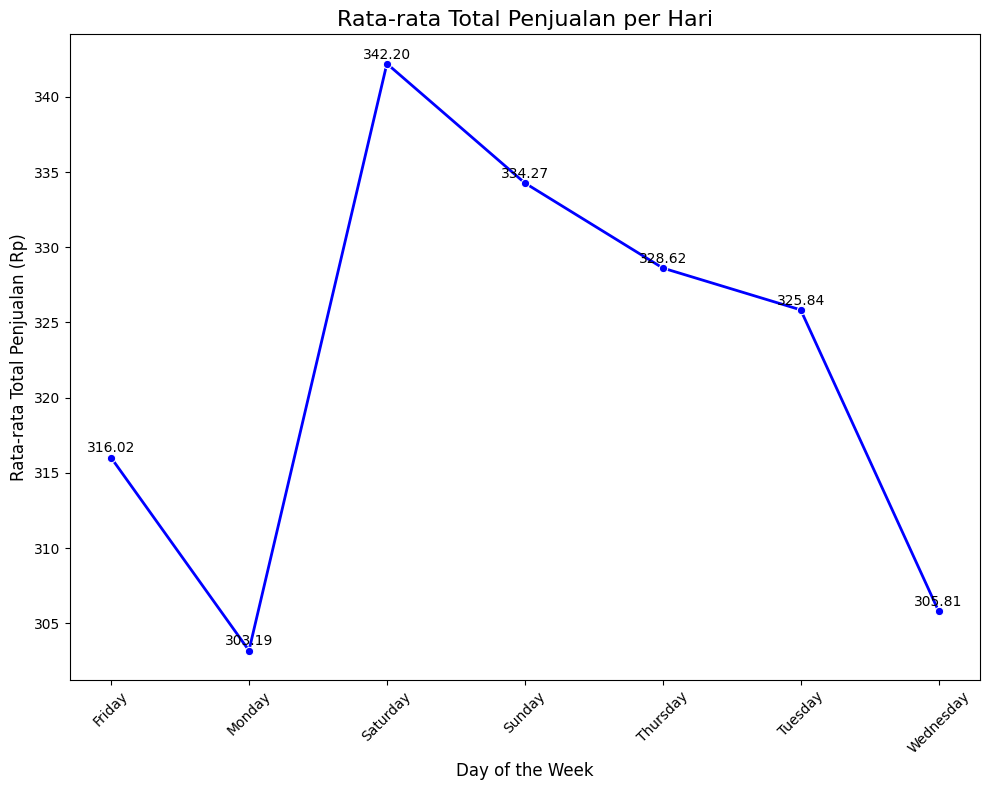

In [ ]:
# Visualisasi lineplot
plt.figure(figsize=(10, 8))
sns.lineplot(data=rata_rata_penjualan, x="DayOfWeek", y="Total", marker="o", color="blue", linewidth=2)

# Menambahkan angka di setiap titik (Opsional)
for i, total in enumerate(rata_rata_penjualan["Total"]):
    plt.text(i, total + (0.001 * (rata_rata_penjualan["Total"]).max()), f"{total:,.2f}",
             ha="center", fontsize=10, color="black")

# Menambahkan judul dan label
plt.title("Rata-rata Total Penjualan per Hari", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Rata-rata Total Penjualan (Rp)", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()  # Menghindari elemen terpotong
plt.show()

**Observation**
Rata-rata penjualan tertinggi per harinya ialah pada hari sabtu, kemudian menurun seiring berganti hari.

### EDA Conclusion :
1. Produk yang memiliki harga per unit diatas rata-rata ialah : Fashion Accessories, Sports and travel, Health and Beauty
2. Total penjualan tertinggi ialah pada Food and Beverages, walaupun harga per unitnya berada di urutan ke 4 (pada pertanyaan 1), tapi total penjualannya paling tinggi dibandingkan barang yang lain.
3. Total penjualan tertinggi ialah pada branch C.
4. Branch c memiliki total penjualan tertinggi namun memiliki quantity barang yang sedikit hal ini menandakan barang yang terjual di branch c memiliki harga yang relatif tinggi dibandingkan branch lainnya, walaupun dari selisih quantity tidak terlalu jauh.
5. Informasi penjualan tiap branch :
- Branch A : total penjualan banyak berasal dari Home and lifecycle
- Branch B : total penjualan banyak dari Health and beauty, & sports and travel
- Branch C : total penjualan banyak berasal dari Food and Beverages

6. Metode Pembayaran tiap branch :
- Branch A dan B memiliki karakteeristik yang mirip yaitu banyak menggunakan ewallet, namun pada branch B tidak terlalu dominan hanya terdapat sedikit perbedaan.
- Pada branch C transaksi terbanyak dilakukan menggunakan cash.
7. Rata-rata penjualan tertinggi per harinya ialah pada hari sabtu, kemudian menurun seiring berganti hari.